### Import Quasar catalog for DR14

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="/home/hquintero/eboss/"
local_file = os.path.join(local_dir,file)

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
    
    
catalog=Table.read('DR14Q_v4_4.fits')

w=(catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC']) & (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0)

reduced_cat=catalog[w]
len(reduced_cat)
#catalog
#plt.style.use('bmh')
#plt.hist(reduced_cat['FIRST_SNR'])
#stats.describe(reduced_cat['FIRST_SNR'])

/home/hquintero/eboss/DR14Q_v4_4.fits already exist


168045

### Creating small catalog

In [2]:
small_cat=reduced_cat[0:168046]

#small_cat

for i in range(1):
    print("--", i + 1)
    print("Label:", small_cat['Z'][i])

-- 1
Label: 2.497


### Plot data

(array([9.9086e+04, 4.4688e+04, 1.7475e+04, 5.4050e+03, 1.0150e+03,
        3.2500e+02, 4.2000e+01, 2.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([2.1       , 2.58680266, 3.07360532, 3.56040798, 4.04721064,
        4.5340133 , 5.02081596, 5.50761862, 5.99442128, 6.48122394,
        6.9680266 ]),
 <BarContainer object of 10 artists>)

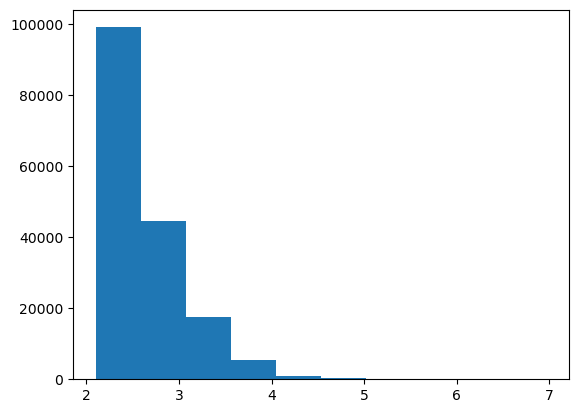

In [3]:
plt.hist(small_cat['Z'])

### Saving data as a new fits catalog file for quasars with query

In [4]:
from astropy.io import fits

archivo = fits.open('exDR14Qcat.fits')
#archivo.info()
#archivo[1] = hdu # assuming the first extension is a table

#hdu[0] = archivo[0]
hdu = fits.BinTableHDU(small_cat)
archivo[1] = hdu


archivo.close()

passer = archivo

with fits.open('exDR14Qcat.fits', mode='update') as passer:
    # Change something in hdul.
    
    passer[1] = hdu
    
    passer.flush()  # changes are written back to original.fits

# closing the file will also flush any changes and prevent further writing


### Checking the number of saved objects in small catalog

In [5]:
pruf=Table.read('exDR14Qcat.fits')
pruf

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.66+145828.8,0.002756432550313548,14.974675485824303,244864389,6177,56268,595,BOSS,2.497,0.0,VI,2.496999979019165,2.49796199798584,0.0008690897957421839,0,2.5099661,-1.0,-1.0,2199023255552,0,0,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.660184383392334 .. 5.348500728607178,15.485949516296387 .. 0.861799418926239,21.94196891784668 .. 20.659208297729492,0.16387343406677246 .. 0.21075020730495453,-25.664871,0.16341499984264374 .. 0.048689112067222595,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.04631861299276352,701.1042837308206,0.05252976343035698,384.75096219826605,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.5,0.185,5.900000095367432,0.9299,16.206,0.211,5.199999809265137,0.8249,12.321,--,0.30000001192092896,1.149,8.51,0.185,0.699999988079071,1.036,0000,BBUU,0.495515,1.0,1.8603829687921641e-31,3.147684406018196e-32,2.310947837572515e-31,4.565332356351401e-32,2.355314285756731e-31,5.970480393631547e-32,2.427149215733221e-31,6.521724355219432e-32,0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235959.83+344315.0,359.9993034693268,34.720842482815726,401165277,7145,56567,240,BOSS,3.109,0.0,VI,3.108999967575073,3.1135237216949463,0.00039327019476331765,0,3.1030495,-1.0,-1.0,3298535424000,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.26430341601371765 .. 15

### Comparing the FITS properties between saved and prior catalog

In [6]:
nuevo = fits.open('exDR14Qcat.fits')
nuevo.info()

Filename: exDR14Qcat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7055,)   uint8   
  1  DR14Q_v4_4    1 BinTableHDU    357   168045R x 105C   [18A, D, D, J, I, J, I, 4A, D, D, 4A, D, D, D, I, D, D, D, K, K, K, K, K, K, I, I, I, 51J, 51J, 51J, 51A, D, D, I, 1A, I, I, 1A, 5D, 5D, 5D, 5D, D, 5D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, E, I, D, D, E, I, D, D, E, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, E, D, D, D, D, D, D, D, D, I, D, D, D]   


In [7]:
nuevo = fits.open('DR14Q_v4_4.fits')
nuevo.info()

Filename: DR14Q_v4_4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7055,)   uint8   
  1  DR14Q_v4_4    1 BinTableHDU    328   526356R x 105C   [18A, D, D, J, I, J, I, 4A, D, D, 4A, D, D, D, I, D, D, D, K, K, K, K, K, K, I, I, I, 51J, 51J, 51J, 51A, D, D, I, A, I, I, A, 5D, 5D, 5D, 5D, D, 5D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, E, I, D, D, E, I, D, D, E, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, E, D, D, D, D, D, D, D, D, I, D, D, D]   


### Proof

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
    
    
catalog=Table.read('DR14Q_v4_4.fits')

w=(catalog['THING_ID']==110619413)
reduced_cat=catalog[w]
reduced_cat
#catalog
#plt.style.use('bmh')
#plt.hist(reduced_cat['FIRST_SNR'])
#stats.describe(reduced_cat['FIRST_SNR'])

/home/colgoat/Jupyter/DR14Q_v4_4.fits already exist


SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.66+145828.8,0.002756432550313548,14.974675485824303,244864389,6177,56268,595,BOSS,2.497,0.0,VI,2.496999979019165,2.49796199798584,0.0008690897957421839,0,2.5099661,-1.0,-1.0,2199023255552,0,0,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.660184383392334 .. 5.348500728607178,15.485949516296387 .. 0.861799418926239,21.94196891784668 .. 20.659208297729492,0.16387343406677246 .. 0.21075020730495453,-25.664871,0.16341499984264374 .. 0.048689112067222595,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.04631861299276352,701.1042837308206,0.05252976343035698,384.75096219826605,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.5,0.185,5.900000095367432,0.9299,16.206,0.211,5.199999809265137,0.8249,12.321,--,0.30000001192092896,1.149,8.51,0.185,0.699999988079071,1.036,0000,BBUU,0.495515,1.0,1.8603829687921641e-31,3.147684406018196e-32,2.310947837572515e-31,4.565332356351401e-32,2.355314285756731e-31,5.970480393631547e-32,2.427149215733221e-31,6.521724355219432e-32,0,-1.0,-1.0,-1.0
000001.37-011930.0,0.005746209112004408,-1.3250088011125059,66666942,4354,55810,646,BOSS,2.3280000000000003,0.0,VI,2.328000068664551,2.333164691925049,0.0001957574422704056,0,2.3350306,2.3483452999999996,2.3483452999999996,16492675088384,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,5.298428535461426 .. 10.920283317565918,7.55182409286499 .. 0.9089431166648865,20.688875198364258 .. 19.899463653564453,0.07446388900279999 .. 0.10334030538797379,-26.184576,0.186440572142601 .. 0.05554952844977379,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.09291329234838486,44.988086770623894,0.22756947576999664,2.5174224638761955,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,16.72,0.103,10.60000038146972

In [2]:
w=(catalog['THING_ID']==110619413)
reduced_cat=catalog[w]
reduced_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
023259.60+004801.7,38.24833557824455,0.8004873344302204,110619413,3615,55445,946,BOSS,2.25,0.0,VI,2.25,0.09913666546344756,4.58932772744447e-05,0,2.252736,2.2540944,2.2540944,246784,0,0,0,0,0,0,15,15,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,4.560428142547607 .. 20.3826961517334,14.244935989379883 .. 1.1710692644119263,20.851463317871094 .. 19.225418090820312,0.06296096742153168 .. 0.049094125628471375,-26.441088,0.10553616285324097 .. 0.031444251537323,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.11552616208791733,416.17484786731285,-0.006352559197694063,29.60464338891779,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,15.675,0.042,26.0,0.9083,14.686,0.058,18.600000381469727,0.8928,11.087,0.122,8.899999618530273,0.9082,8.427999999999999,0.042,4.099999904632568,0.9104,0000,AABB,0.175844,1.0,1.0257672154992935e-30,3.3786993149343086e-32,9.786165384154944e-31,4.1433724960764165e-32,9.225027639264496e-31,5.774854623767702e-32,1.3124616360264275e-30,5.807810783387357e-32,0,-1.0,-1.0,-1.0


## REPEATING THE PROCESS INCLUDING BAL QUASARS

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL = "https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file = "DR14Q_v4_4.fits"
local_dir = "/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
    
    
catalog = Table.read('DR14Q_v4_4.fits')

w = (catalog['THING_ID']>0) & (catalog['Z']>=2.1) & (catalog['RA']!=catalog['DEC']) \
& (catalog['RA']>0) & (catalog['MJD']< 56870) #& (catalog['BI_CIV']<=0)
reduced_cat = catalog[w]
reduced_cat

/home/colgoat/Jupyter/DR14Q_v4_4.fits already exist


SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.66+145828.8,0.002756432550313548,14.974675485824303,244864389,6177,56268,595,BOSS,2.497,0.0,VI,2.496999979019165,2.49796199798584,0.0008690897957421839,0,2.5099661,-1.0,-1.0,2199023255552,0,0,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.660184383392334 .. 5.348500728607178,15.485949516296387 .. 0.861799418926239,21.94196891784668 .. 20.659208297729492,0.16387343406677246 .. 0.21075020730495453,-25.664871,0.16341499984264374 .. 0.048689112067222595,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.04631861299276352,701.1042837308206,0.05252976343035698,384.75096219826605,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.5,0.185,5.900000095367432,0.9299,16.206,0.211,5.199999809265137,0.8249,12.321,--,0.30000001192092896,1.149,8.51,0.185,0.699999988079071,1.036,0000,BBUU,0.495515,1.0,1.8603829687921641e-31,3.147684406018196e-32,2.310947837572515e-31,4.565332356351401e-32,2.355314285756731e-31,5.970480393631547e-32,2.427149215733221e-31,6.521724355219432e-32,0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235959.98+344449.6,359.9999541295649,34.747133291446325,401165238,7145,56567,262,BOSS,2.375,0.0,VI,2.375,2.397723913192749,0.0003489350492600352,0,2.3635013,2.3669076000000002,2.3669076000000002,3298535424000,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,199.63788,13.583471,0,-,0,0,-

In [3]:
small_cat=reduced_cat[0:180486]

#small_cat

for i in range(1):
    print("--", i + 1)
    print("Label:", small_cat['Z'][i])

-- 1
Label: 2.497


In [4]:
from astropy.io import fits

archivo = fits.open('BALsamDR14.fits')
#archivo.info()
#archivo[1] = hdu # assuming the first extension is a table

#hdu[0] = archivo[0]
hdu = fits.BinTableHDU(small_cat)
archivo[1] = hdu


archivo.close()

passer = archivo

with fits.open('BALsamDR14.fits', mode='update') as passer:
    # Change something in hdul.
    
    passer[1] = hdu
    passer.flush()  # changes are written back to original.fits

# closing the file will also flush any changes and prevent further writing


In [5]:
pruf=Table.read('BALsamDR14.fits')
pruf

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.66+145828.8,0.002756432550313548,14.974675485824303,244864389,6177,56268,595,BOSS,2.497,0.0,VI,2.496999979019165,2.49796199798584,0.0008690897957421839,0,2.5099661,-1.0,-1.0,2199023255552,0,0,0,0,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.660184383392334 .. 5.348500728607178,15.485949516296387 .. 0.861799418926239,21.94196891784668 .. 20.659208297729492,0.16387343406677246 .. 0.21075020730495453,-25.664871,0.16341499984264374 .. 0.048689112067222595,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.04631861299276352,701.1042837308206,0.05252976343035698,384.75096219826605,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,17.5,0.185,5.900000095367432,0.9299,16.206,0.211,5.199999809265137,0.8249,12.321,--,0.30000001192092896,1.149,8.51,0.185,0.699999988079071,1.036,0000,BBUU,0.495515,1.0,1.8603829687921641e-31,3.147684406018196e-32,2.310947837572515e-31,4.565332356351401e-32,2.355314285756731e-31,5.970480393631547e-32,2.427149215733221e-31,6.521724355219432e-32,0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235959.98+344449.6,359.9999541295649,34.747133291446325,401165238,7145,56567,262,BOSS,2.375,0.0,VI,2.375,2.397723913192749,0.0003489350492600352,0,2.3635013,2.3669076000000002,2.3669076000000002,3298535424000,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,199.63788,13.583471,0,-,0,0,-

In [6]:
nuevo = fits.open('BALsamDR14.fits')
nuevo.info()

Filename: BALsamDR14.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7055,)   uint8   
  1  DR14Q_v4_4    1 BinTableHDU    357   180485R x 105C   [18A, D, D, J, I, J, I, 4A, D, D, 4A, D, D, D, I, D, D, D, K, K, K, K, K, K, I, I, I, 51J, 51J, 51J, 51A, D, D, I, 1A, I, I, 1A, 5D, 5D, 5D, 5D, D, 5D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, E, I, D, D, E, I, D, D, E, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, E, D, D, D, D, D, D, D, D, I, D, D, D]   


## Catalog for SideBands

In [1]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

DATA_URL = "https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file = "DR14Q_v4_4.fits"
local_dir = "/home/colgoat/Jupyter/"
local_file = os.path.join(local_dir,file)

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))
    
    
catalog = Table.read('DR14Q_v4_4.fits')

/home/colgoat/Jupyter/DR14Q_v4_4.fits already exist


In [7]:
w = (catalog['THING_ID']>0) & (catalog['Z']<=2.1) & (catalog['RA']!=catalog['DEC']) \
& (catalog['RA']>0) & (catalog['MJD']< 56870) & (catalog['BI_CIV']<=0)
reduced_cat = catalog[w]
len(reduced_cat)

101784

In [8]:
small_cat=reduced_cat[0:1017845]

#small_cat

for i in range(1):
    print("--", i + 1)
    print("Label:", small_cat['Z'][i])

-- 1
Label: 1.619


In [9]:
from astropy.io import fits

archivo = fits.open('SBcatDR14.fits')
#archivo.info()
#archivo[1] = hdu # assuming the first extension is a table

#hdu[0] = archivo[0]
hdu = fits.BinTableHDU(small_cat)
archivo[1] = hdu


archivo.close()

passer = archivo

with fits.open('SBcatDR14.fits', mode='update') as passer:
    # Change something in hdul.
    
    passer[1] = hdu
    passer.flush()  # changes are written back to original.fits

# closing the file will also flush any changes and prevent further writing


In [10]:
pruf=Table.read('SBcatDR14.fits')
pruf

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,SPECTRO_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],bytes1[51],float64,float64,int16,bytes1,int16,int16,bytes1,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.97+044947.2,0.004052389452795069,4.829780562529699,154078229,4415,55831,464,BOSS,1.619,0.0,VI,1.61899995803833,1.6172041893005369,0.00048571047955192636,0,1.6273098,1.6304535,1.6304535,2199023910912,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,6.689760208129883 .. 19.600666046142578,7.062735080718994 .. 0.5412449240684509,20.435998916625977 .. 19.267778396606445,0.061016492545604706 .. 0.07507961243391037,-25.806284,0.13920745253562927 .. 0.0414765328168869,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.349308043718338,22.587234277440285,1.573292851448059,13.871135159044835,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,15.503,0.044,24.5,0.9052,13.987,0.044,24.5,0.913,10.764,0.112,9.699999809265137,0.9418,8.056000000000001,0.044,5.300000190734863,1.052,0000,AABB,0.26852,1.0,5.5254370569158805e-31,3.5955865449950646e-32,6.597499659809314e-31,4.1546516582461446e-32,9.038159772512016e-31,4.4203324833151824e-32,8.567425066363647e-31,5.178768491431826e-32,0,-1.0,-1.0,-1.0
000001.27-020159.7,0.005316971570891838,-2.033273291001564,62120483,4354,55810,678,BOSS,1.36,0.0,VI,1.3600000143051147,1.3604756593704224,0.0004507622215896845,0,1.3619123,1.3622836,1.3622836,262144,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,5.7982611656188965 .. 28.749858856201172,10.57221794128418 .. 1.0262092351913452,20.591123580932617 .. 18.852691650390625,0.0575224943459034 .. 0.037230249494314194,-25.890327,0.1619756519794464 .. 0.04826026037335396,0.0,0.0,-1.0,--,--,--,--,--,--,--,--,1.0,0.0,0.0,0.0,0.0,--,--,--,-1,--,--,--,-1,--,--,--,-1,--,14.888,0.034,32.0,1.105,13.519,0.035,31.299999237060547,0.9211,10.444,0.08800000000000001,12.300000190734863,0.9571,8.145,0

In [11]:
nuevo = fits.open('SBcatDR14.fits')
nuevo.info()

Filename: SBcatDR14.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7055,)   uint8   
  1  DR14Q_v4_4    1 BinTableHDU    357   101784R x 105C   [18A, D, D, J, I, J, I, 4A, D, D, 4A, D, D, D, I, D, D, D, K, K, K, K, K, K, I, I, I, 51J, 51J, 51J, 51A, D, D, I, 1A, I, I, 1A, 5D, 5D, 5D, 5D, D, 5D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, E, I, D, D, E, I, D, D, E, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, E, D, D, D, D, D, D, D, D, I, D, D, D]   
